In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
E_P = pd.read_csv(r"/content/Regrerssion_energy_production_data.csv",sep=";")
E_P

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
E_P[E_P.duplicated()].shape

(41, 5)

In [4]:
duplicates = E_P[E_P.duplicated()]
duplicates

#It does seem like there are similarities between these data points,
#but they're not exact duplicates across all columns. There might be a few
#columns that are identical while others have varying values.

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [5]:
df = E_P.drop_duplicates()
df.shape

(9527, 5)

In [6]:
E_P.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [7]:
df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


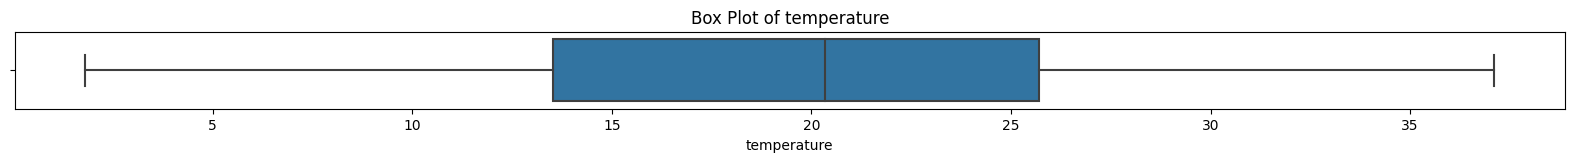

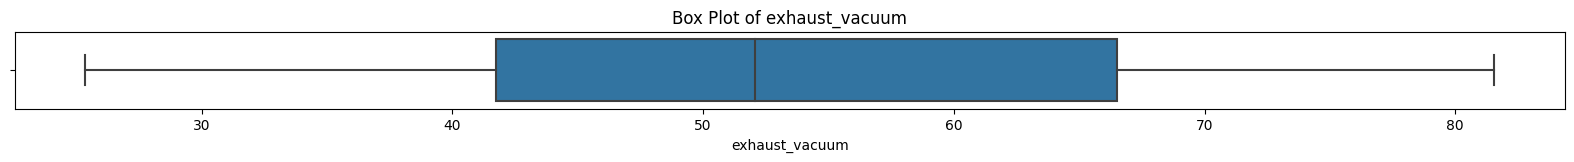

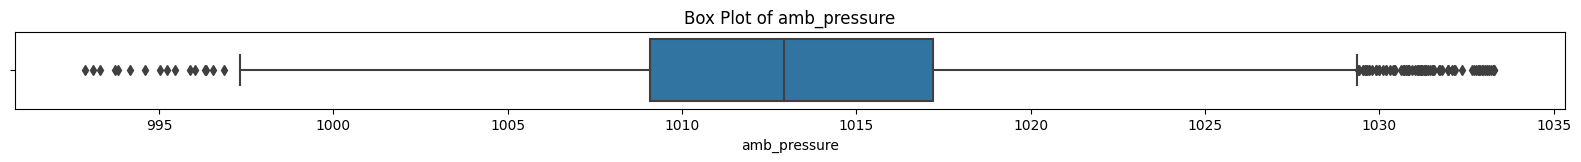

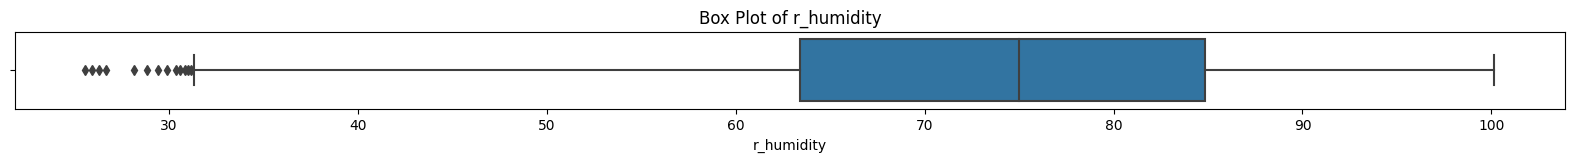

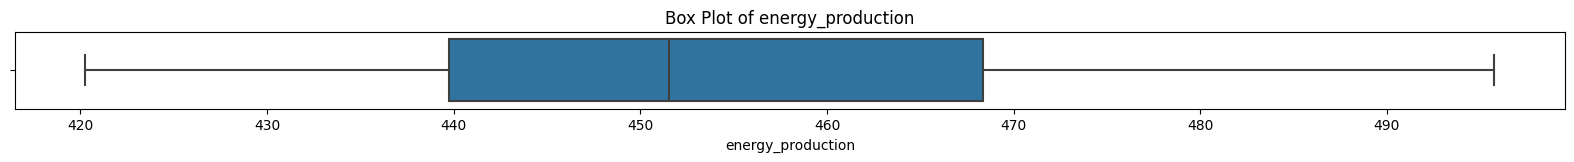

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0,1,2,3,4]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df.iloc[:, column])
    plt.title(f"Box Plot of {df.columns[column]}")
    plt.show()


In [9]:
from scipy import stats

# Function to detect and remove outliers using Z-score method
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    filtered_data = df[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Detect and remove outliers
filtered_data = remove_outliers_zscore(df)

In [10]:
filtered_data.shape

(9469, 5)

In [11]:
from scipy import stats
import numpy as np

def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    outlier_indices = np.where((z_scores >= threshold).any(axis=1))[0]
    filtered_data = df[(z_scores < threshold).all(axis=1)]
    return filtered_data, outlier_indices


In [12]:
# Assume 'df' is your DataFrame
filtered_data, outlier_indices = remove_outliers_zscore(df)


In [13]:
filtered_data #without removing outliers

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [14]:
outlier_indices #these are the outliers

array([  30,   38,  233,  315,  385,  400,  426,  534,  835,  922, 1154,
       1166, 1254, 1527, 1541, 1992, 2399, 2449, 2790, 2839, 2895, 3387,
       3392, 3590, 4115, 4122, 4231, 4277, 4529, 4635, 4777, 5161, 5175,
       5283, 5406, 5496, 5555, 6165, 6180, 6201, 6871, 6972, 6977, 7065,
       7163, 7570, 7687, 7748, 7908, 8084, 8268, 8340, 8468, 8756, 8794,
       9025, 9090, 9330])

In [15]:
filtered_data[filtered_data.index.isin([30,   38,  233,  315,  385,  400,  426,  534,  835,  922, 1154,
       1166, 1254, 1527, 1541, 1992, 2399, 2449, 2790, 2839, 2895, 3387,
       3392, 3590, 4115, 4122, 4231, 4277, 4529, 4635, 4777, 5161, 5175,
       5283, 5406, 5496, 5555, 6165, 6180, 6201, 6871, 6972, 6977, 7065,
       7163, 7570, 7687, 7748, 7908, 8084, 8268, 8340, 8468, 8756, 8794,
       9025, 9090, 9330])] #this record should be pulled


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2399,15.08,42.77,1018.43,73.19,461.68
2449,19.69,59.14,1015.99,70.33,448.69
2790,20.16,57.76,1019.34,72.10,455.13
2839,25.34,59.39,1014.02,73.58,439.80
2895,12.31,41.06,1021.19,74.38,475.76
3387,31.92,68.30,1015.58,41.55,430.07
3392,26.10,74.16,1009.42,85.40,437.18
3590,17.01,50.90,1013.23,82.03,460.14
4115,23.69,73.67,1007.19,86.73,437.57
4122,17.79,46.21,1010.38,85.25,448.74


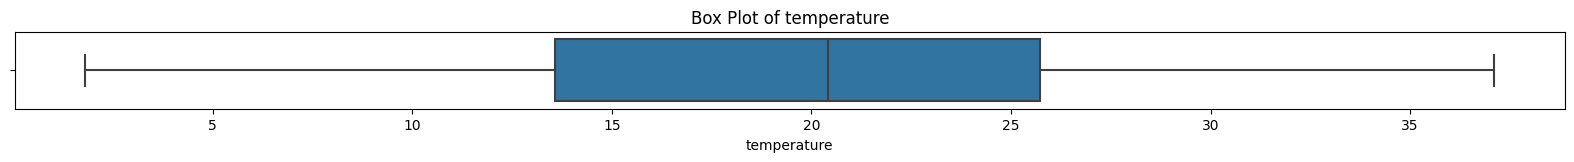

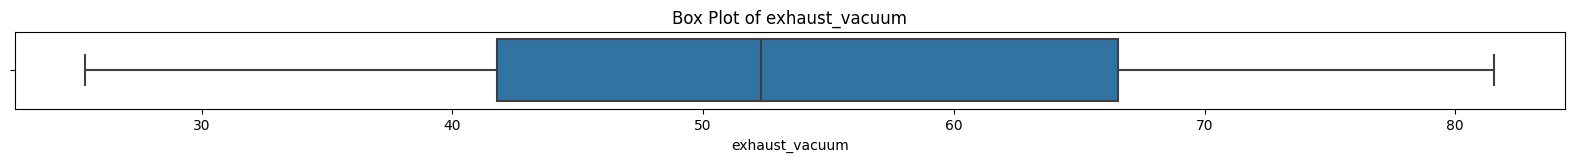

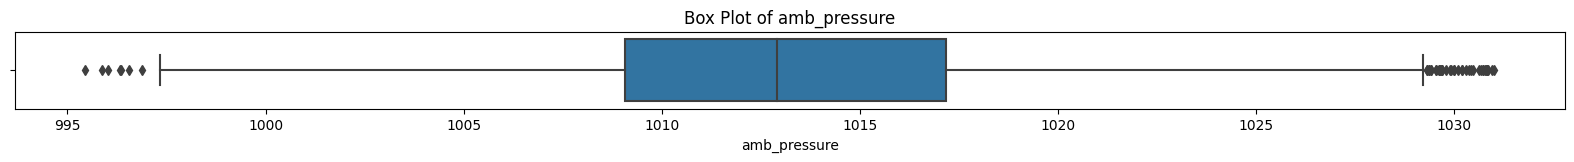

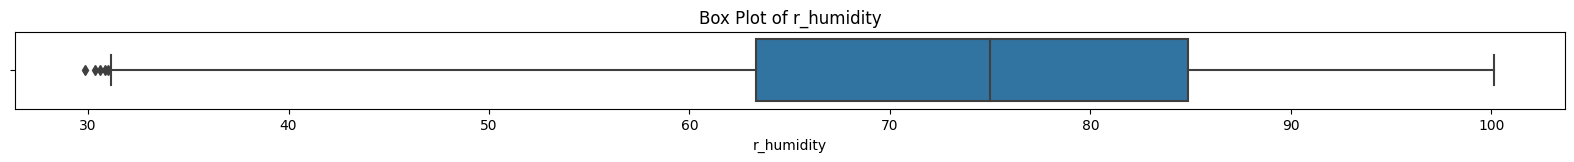

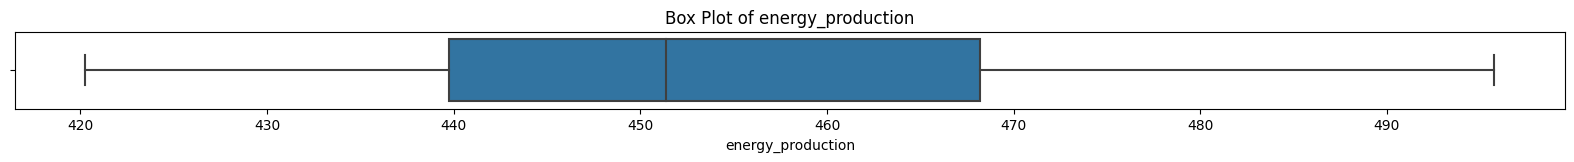

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_Features = [0, 1, 2, 3, 4]  # Adjust column indices as needed

for column in columns_Features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=filtered_data.iloc[:, column])
    plt.title(f"Box Plot of {filtered_data.columns[column]}")
    plt.show()


In [17]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = [  "amb_pressure" , "r_humidity" ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = filtered_data.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df = data_without_outliers

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9420 rows x 5 columns]


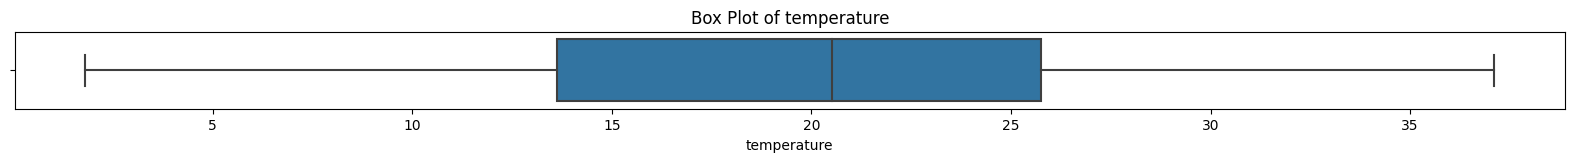

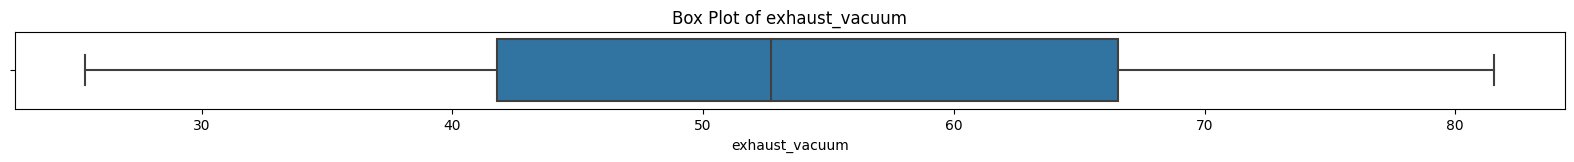

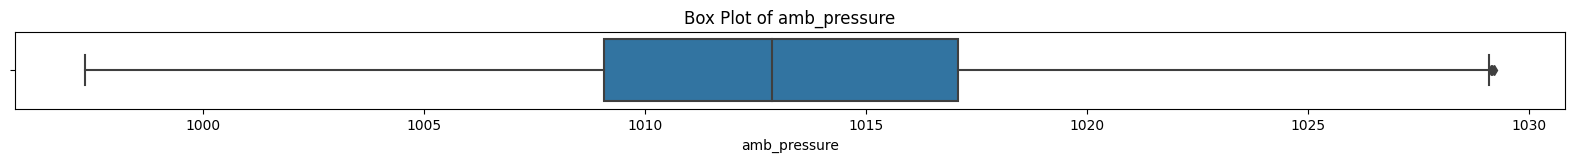

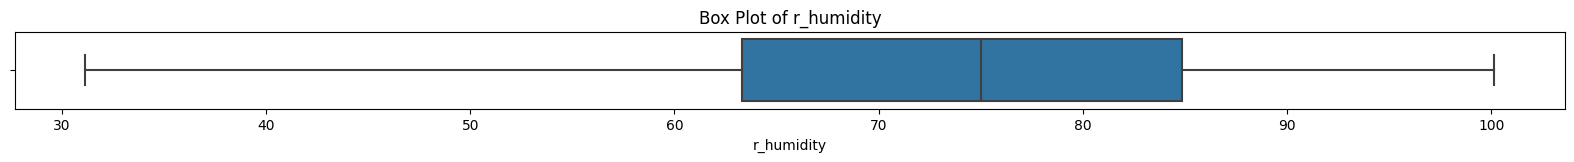

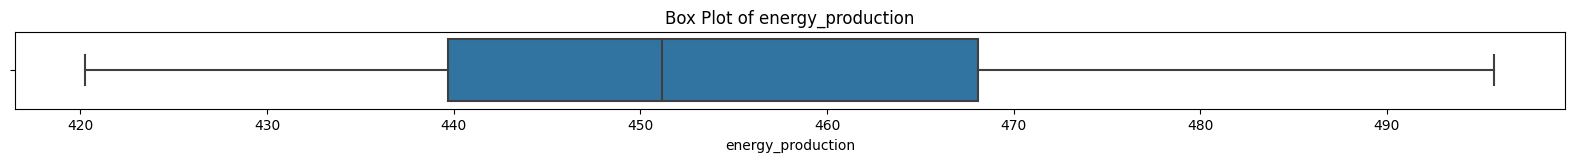

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_Features = [0, 1, 2, 3, 4]  # Adjust column indices as needed

for column in columns_Features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df.iloc[:, column])
    plt.title(f"Box Plot of {df.columns[column]}")
    plt.show()


In [19]:
import plotly.express as px
fig = px.box(df, y="amb_pressure")
fig.show()

In [20]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = [  "amb_pressure" , "r_humidity" ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df_data = data_without_outliers

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9417 rows x 5 columns]


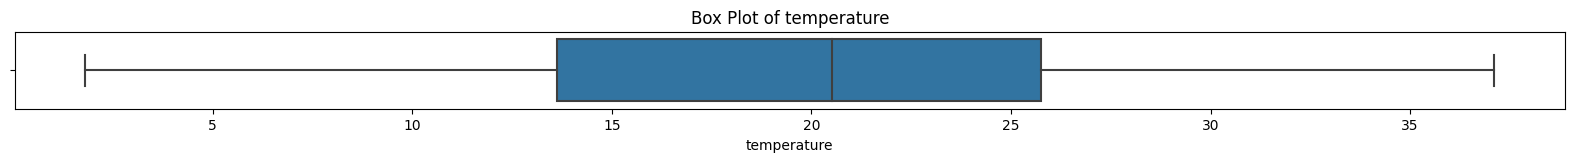

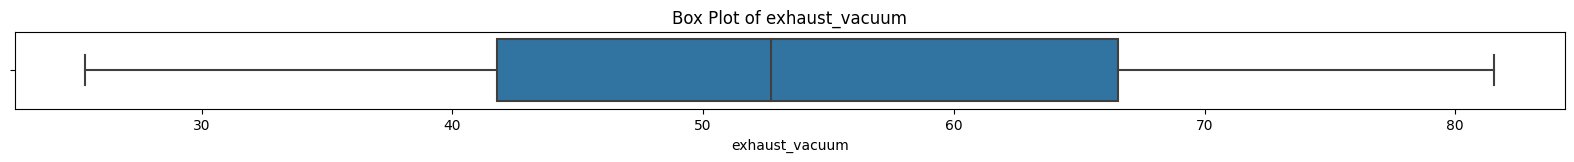

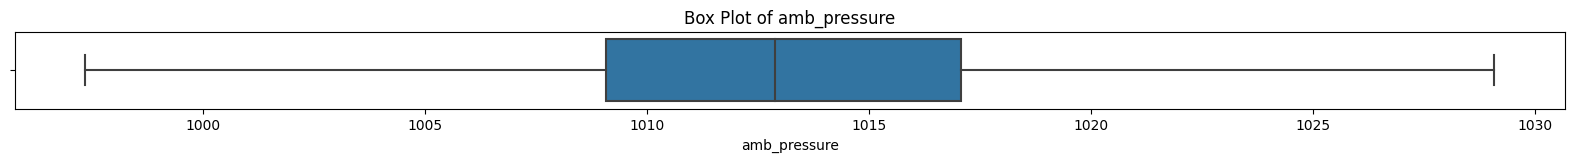

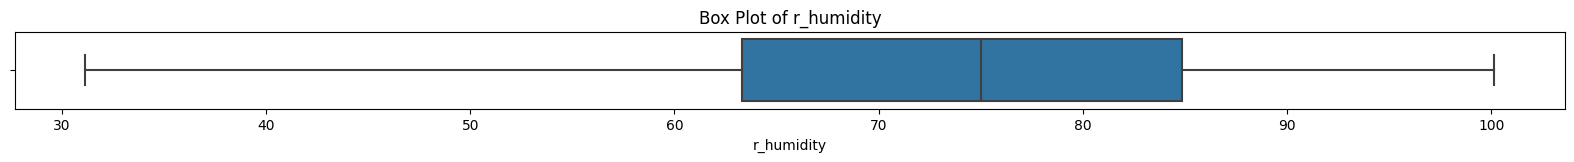

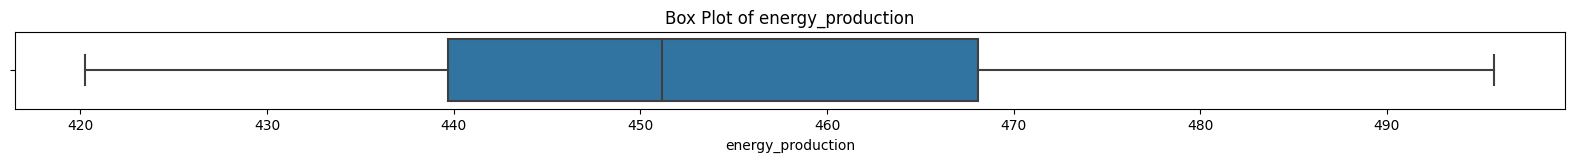

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_Features = [0, 1, 2, 3, 4]  # Adjust column indices as needed

for column in columns_Features:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df_data.iloc[:, column])
    plt.title(f"Box Plot of {df_data.columns[column]}")
    plt.show()


In [22]:
df_data.shape

(9417, 5)

# Preparing Model Building part by removing outliers

In [23]:
import statsmodels.formula.api as smf
model_1 = smf.ols("energy_production~temperature+exhaust_vacuum +amb_pressure +r_humidity",data=df_data).fit()
print("dependent *energy_production* value r2:-  ",model_1.rsquared)
print("                                r2_Adj:-  ",model_1.rsquared_adj)
print("                                  AIC :-  ",model_1.aic)


dependent *energy_production* value r2:-   0.9277425155023922
                                r2_Adj:-   0.9277118068391973
                                  AIC :-   55345.53530507031


In [24]:
import statsmodels.formula.api as smf
model_2 = smf.ols("temperature~energy_production+exhaust_vacuum+amb_pressure +r_humidity",data=df_data).fit()
print("dependent *temperature* value     r2:-  ",model_2.rsquared)
print("                              r2_Adj:-  ",model_2.rsquared_adj)
print("                                AIC :-  ",model_2.aic)


dependent *temperature* value     r2:-   0.9379886146029265
                              r2_Adj:-   0.9379622604229872
                                AIC :-   38286.675197374825


In [25]:
import statsmodels.formula.api as smf
model_3 = smf.ols("exhaust_vacuum~energy_production+temperature+amb_pressure +r_humidity",data=df_data).fit()
print("dependent *exhaust_vacuum* value  r2:-  ",model_3.rsquared)
print("                              r2_Adj:-  ",model_3.rsquared_adj)
print("                                AIC :-  ",model_3.aic)


dependent *exhaust_vacuum* value  r2:-   0.7689562049353391
                              r2_Adj:-   0.7688580137772156
                                AIC :-   60772.45738530068


In [26]:
df_num = df_data.iloc[:,[0,1,2,3,4]]
df_num

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [27]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X1 = SS.fit_transform(df_num)

In [28]:
X1= pd.DataFrame(X1)
X1.columns=list(df_num)
X1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.368335,-1.250703,0.685806,-0.909224,1.597114
1,-1.037955,-0.952542,1.162643,1.465225,0.659161
2,-0.791181,-0.736415,1.989629,0.573691,0.666222
3,-0.811408,-0.009155,0.840646,0.394422,0.758605
4,-0.619922,-0.376729,1.877018,0.114186,0.554421
...,...,...,...,...,...
9412,-0.355618,-0.372785,-1.334152,0.582620,0.186065
9413,0.673282,0.861664,0.406039,-1.410627,-0.425899
9414,1.443271,0.143869,-1.393976,-1.174350,-1.460354
9415,0.439993,0.917667,1.319243,0.477531,-1.917562


In [29]:
df = X1.copy()

In [30]:
# from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.iloc[:,0:4]
y = df["energy_production"]

# Splitting the data into train and test sets (adjust test_size and random_state as needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((7533, 4), (1884, 4))

# Support vector Regressor model building

SVR with linear kernel

In [31]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model = SVR(kernel='linear')  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)

# Train the SVM model
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.069
R-squared Score: 0.929


In [33]:
import plotly.graph_objects as go

y_pred = svm_model.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


SVR with Radial Basis Function (RBF) Kernel

In [34]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model = SVR(kernel='rbf')  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on test data
predictions = svm_model.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.052
R-squared Score: 0.946


In [36]:
import plotly.graph_objects as go

y_pred = svm_model.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


SVR with Polynomial Kernel

In [37]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model_3 = SVR(kernel='poly')
# Train the SVM model
svm_model_3.fit(X_train, y_train)

# Make predictions on test data
predictions_3 = svm_model_3.predict(X_test)


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions_3 = svm_model_3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_3)
r2 = r2_score(y_test, predictions_3)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.216
R-squared Score: 0.778


In [39]:
import plotly.graph_objects as go

y_pred = svm_model_3.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


Sigmoid Kernel: This kernel is based on hyperbolic tangent functions and can map data into higher dimensions.
                It's less commonly used compared to others.
            As per our data we don't see the pattern of hyperbolic tangent in the data distribution so we are not going to perform the Sigmoid Kernel.

# Random forest regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regression model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Train the model
random_forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:

# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 0.03628371173678521
R-squared Score: 0.9627175458943513


In [42]:
import plotly.graph_objects as go

y_pred = random_forest.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Retail Price',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


Trying with the Estimaters in Random forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest with different parameters
params = [
    {'n_estimators': 50, 'max_depth': 5, 'random_state': 42},
    {'n_estimators': 100, 'max_depth': 10, 'random_state': 42},
    {'n_estimators': 150, 'max_depth': None, 'random_state': 42},
]

for i, param_set in enumerate(params):

    random_forest = RandomForestRegressor(**param_set)

    random_forest.fit(X_train, y_train)

    predictions = random_forest.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared score
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Random Forest Model {i+1} - Mean Squared Error (MSE): {mse.round(3)}")
    print(f"Random Forest Model {i+1} - R-squared Score: {r2.round(3)}")

Random Forest Model 1 - Mean Squared Error (MSE): 0.058
Random Forest Model 1 - R-squared Score: 0.94
Random Forest Model 2 - Mean Squared Error (MSE): 0.04
Random Forest Model 2 - R-squared Score: 0.958
Random Forest Model 3 - Mean Squared Error (MSE): 0.036
Random Forest Model 3 - R-squared Score: 0.963


GridSearchCV with cross validation

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'random_state': [42]
}

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Best Parameters: {best_params}")
print(f"Best Model - Mean Squared Error (MSE): {mse.round(3)}")
print(f"Best Model - R-squared Score: {r2.round(3)}")


Best Parameters: {'max_depth': None, 'n_estimators': 150, 'random_state': 42}
Best Model - Mean Squared Error (MSE): 0.036
Best Model - R-squared Score: 0.963


In [45]:
import plotly.graph_objects as go

y_pred = grid_search.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train a linear regression model
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_pred = model1.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.0680275236265949
R-squared Score: 0.9300999565334391


In [48]:
import plotly.graph_objects as go

y_pred = model1.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Retail Price',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# K-Nearest Neighbors (KNN) Regressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=4)

# Train the KNN Regressor
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=4)

In [50]:

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")

Mean Squared Error (MSE): 0.046
R-squared Score: 0.953


In [51]:
import plotly.graph_objects as go

y_pred = knn_regressor.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Retail Price',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# Boosting Techniques

Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [53]:

predictions = gradient_boosting.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse.round(3)}")
print(f"Gradient Boosting - R-squared Score: {r2.round(3)}")


Gradient Boosting - Mean Squared Error (MSE): 0.049
Gradient Boosting - R-squared Score: 0.95


In [54]:
import plotly.graph_objects as go

y_pred = gradient_boosting.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


AdaBoost Regressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [56]:
# Make predictions
predictions = adaboost.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"AdaBoost - Mean Squared Error (MSE): {mse.round(3)}")
print(f"AdaBoost - R-squared Score: {r2.round(3)}")


AdaBoost - Mean Squared Error (MSE): 0.089
AdaBoost - R-squared Score: 0.909


In [57]:
import plotly.graph_objects as go

y_pred = adaboost.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


XGB Regressor

In [58]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgboost = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgboost.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
# Make predictions and evaluate the model
predictions = xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 0.08879045103078877
R-squared Score: 0.908765510552242


In [60]:
import plotly.graph_objects as go

y_pred = xgboost.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


#Bagging

In [61]:
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

# Instantiate DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(random_state=42)

# Initialize XGBoost Regressor
base_estimator = BaggingRegressor(base_estimator=base_estimator,n_estimators=10, random_state=42)

# Initialize BaggingRegressor with XGBoost as base estimator
bagging = BaggingRegressor(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Train the model
bagging.fit(X_train, y_train)


BaggingRegressor(base_estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                                 random_state=42),
                 random_state=42)

In [63]:
# Fit the BaggingRegressor model with training data
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                                 random_state=42),
                 random_state=42)

In [64]:
# Predict on the test set
y_pred = bagging.predict(X_test)


In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.03861418262586559
R-squared Score: 0.9603229266614297


In [67]:
import plotly.graph_objects as go

y_pred = bagging.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()
